<a href="https://colab.research.google.com/github/tugcebyrl/NLP-Project/blob/main/TwitterSentimentAnalysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk #Natural Language Toolkit
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing Dataset
* Separating words in a sentence (Tokenization)
* Removing the suffixes in the word and finding the root (Stemming)

In [4]:
# Remove pattern
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for word in r:
    input_txt=re.sub(word,"",input_txt)
  return input_txt

In [5]:
# Remove handles
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
# Remove special characters
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
# Remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [8]:
# Individual words --> Tokens
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [9]:
# Stem the words in dataset
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [10]:
# Combine words
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# Data analysis for exploratory

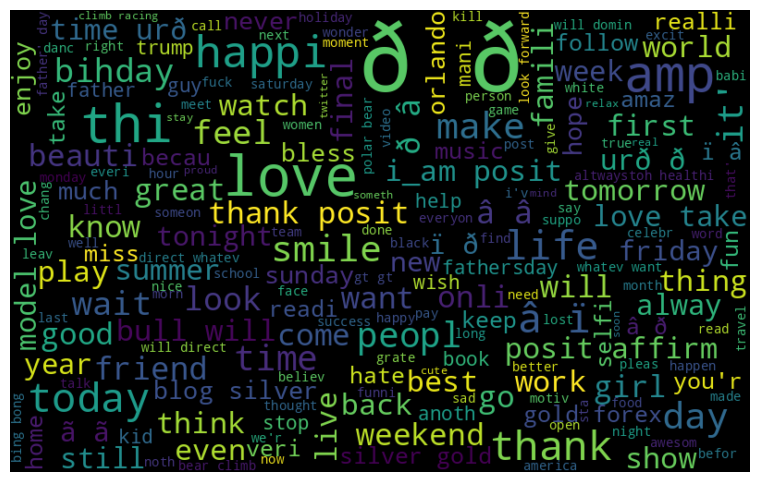

In [11]:
# Find the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# Visualize
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

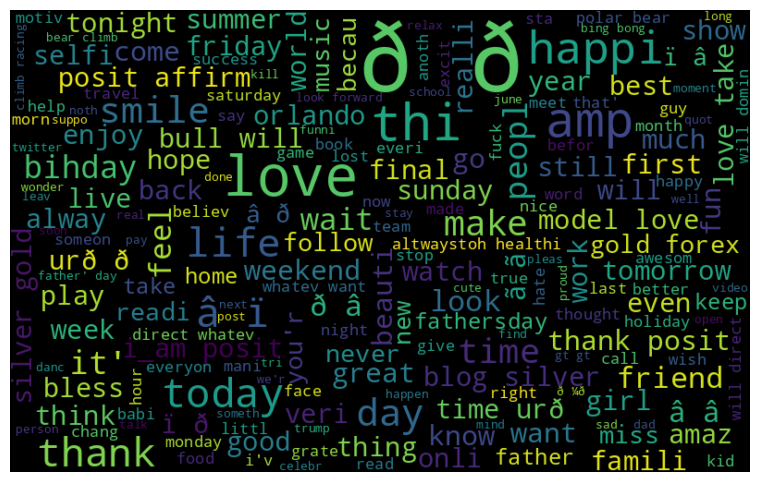

In [12]:
# Find the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# Visualize
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [14]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [15]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [16]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [17]:
freq= nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


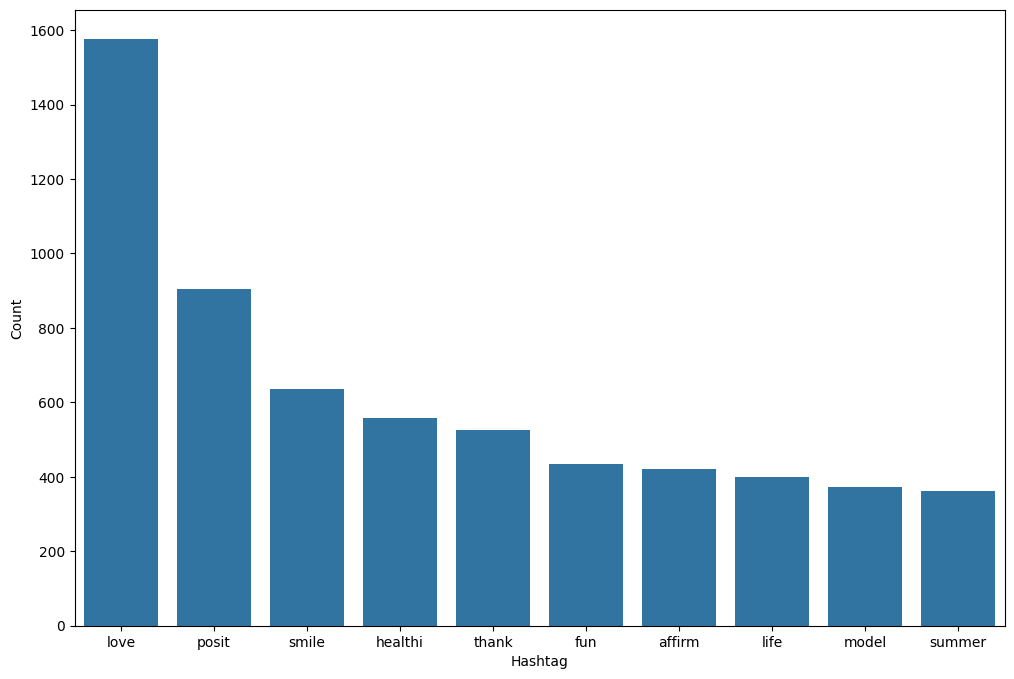

In [18]:
# select top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(12,8))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [19]:
freq_negative= nltk.FreqDist(ht_negative)
d_negative=pd.DataFrame({'Hashtag':list(freq_negative.keys()),
                'Count':list(freq_negative.values())})
d_negative.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


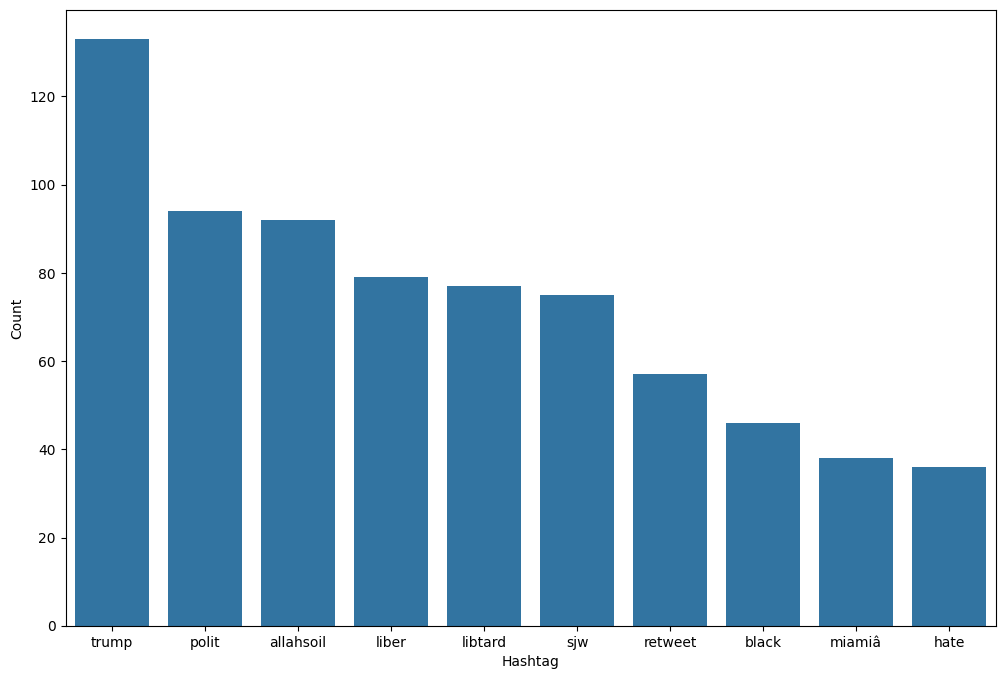

In [20]:
# select top 10 hashtags
d_negative=d_negative.nlargest(columns='Count',n=10)
plt.figure(figsize=(12,8))
sns.barplot(data=d_negative,x='Hashtag',y='Count')
plt.show()

# Input Split

In [21]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])
bow[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

# Model Training

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [24]:
# Training
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
# Testing
pred=model.predict(x_test)
print("F1 Score: ",f1_score(y_test,pred))
print("Acc Score: ",accuracy_score(y_test,pred))

F1 Score:  0.506508875739645
Acc Score:  0.9478162933299963


In [30]:
# Use probability to get output
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
f1_score(y_test,pred)

0.5575992255566312

In [31]:
pred_prob[0][1] >= 0.3

False